<a href="https://colab.research.google.com/github/ogut77/estat.me/blob/main/Chapter7_6_2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bagging

In [ ]:
install.packages('adabag')
library(adabag)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘XML’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘iterators’, ‘rgl’, ‘rlist’, ‘gtools’, ‘caret’, ‘foreach’, ‘doParallel’, ‘ConsRank’


Loading required package: rpart

Loading required package: caret

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



In [ ]:
data(iris)
# mfinal is an integer which is the number of iterations for which boosting is run
iris.bagging <- bagging(Species~., data=iris, mfinal = 10)
# list the importance of variable in the classification
iris.bagging$importance

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
    81.24175     18.75825      0.00000      0.00000

In [ ]:
# list the trees grown along the iterations.
iris.bagging$trees

[[1]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 92 virginica (0.24000000 0.37333333 0.38666667)  
  2) Petal.Width< 1.75 96 40 versicolor (0.37500000 0.58333333 0.04166667)  
    4) Petal.Length< 2.45 36  0 setosa (1.00000000 0.00000000 0.00000000) *
    5) Petal.Length>=2.45 60  4 versicolor (0.00000000 0.93333333 0.06666667) *
  3) Petal.Width>=1.75 54  0 virginica (0.00000000 0.00000000 1.00000000) *

[[2]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 97 versicolor (0.34000000 0.35333333 0.30666667)  
  2) Petal.Length< 2.5 51  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.5 99 46 versicolor (0.00000000 0.53535354 0.46464646)  
    6) Petal.Length< 4.85 52  2 versicolor (0.00000000 0.96153846 0.03846154) *
    7) Petal.Length>=4.85 47  3 virginica (0.00000000 0.06382979 0.93617021) *

[[3]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) roo

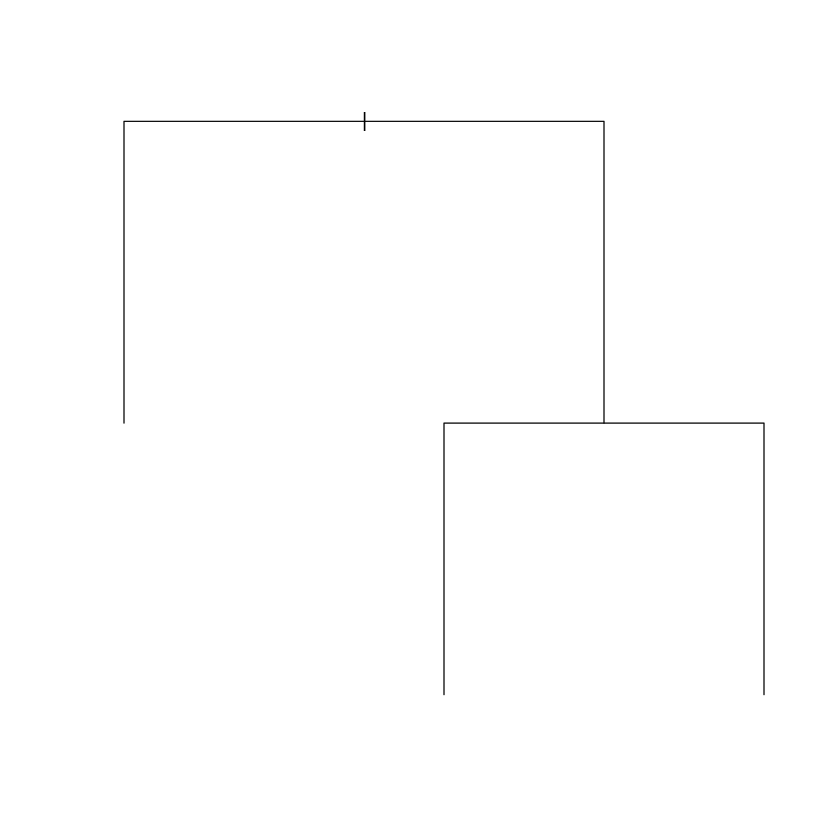

In [ ]:
# plot the decision tree after iteration 10 data
plot(iris.bagging$trees[[10]])

In [ ]:
# classify the iris data using the bagging model
baggingpred <- predict(iris.bagging, newdata=iris)
table(baggingpred$class, iris[,5])

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         45         1
  virginica       0          5        49

In [ ]:
# calculate the misclassification error
baggingtb <- table(baggingpred$class, iris[,5])
baggingerror.rpart <- 1-(sum(diag(baggingtb))/sum(baggingtb))
# misclassification error is 2.67%
baggingerror.rpart

[1] 0.04